#                                        Machine Learning Final Project 

In [548]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', None)
import numpy as np

# Data Loading

In [520]:
X_test=pd.read_csv('C:\\Users\\Abubakar\\Desktop\\Desktop Docs\\Machine Learning/X_test.csv')
X_train=pd.read_csv('C:\\Users\\Abubakar\\Desktop\\Desktop Docs\\Machine Learning/X_train.csv')
Y_train=pd.read_csv('C:\\Users\\Abubakar\\Desktop\\Desktop Docs\\Machine Learning/Y_train.csv')

# Data Preprocessing

In [521]:
X_train=X_train.drop(['id','patient_no','change','Med','cast','examide','citoglipton','glimepiride-pioglitazone','medical_specialty','diag_1','diag_2','diag_3','num_medications','admission_source_id','admission_typeid','payer_code','discharge_disposition_id','time_in_hospital','weight','number_outpatient','max_glu_serum','A1Cresult','num_procedures','num_lab_procedures','number_emergency','number_inpatient','number_diagnoses'],1)

In [522]:
X_train=X_train.dropna()

In [523]:
X_train.shape

(71236, 22)

In [524]:
X_train.describe()

,gender,age group,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,metformin-rosiglitazone,metformin-pioglitazone
count,71236,71236,71236,71236,71236,71236,71236,71236,71236,71236,71236,71236,71236,71236,71236,71236,71236,71236,71236,71236,71236,71236
unique,3,10,4,4,4,3,4,2,4,4,2,4,4,4,4,2,3,4,4,2,2,2
top,Female,[70-80),No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
freq,38212,18352,57216,70170,70755,71175,67634,71235,62346,63734,71224,66098,66784,71033,71207,71233,71208,33276,70733,71227,71235,71235


In [525]:
X_test=X_test.drop(['id','patient_no','change','Med','cast','A1Cresult','examide','citoglipton','max_glu_serum','glimepiride-pioglitazone','medical_specialty','diag_1','diag_2','diag_3','num_medications','admission_source_id','admission_typeid','payer_code','discharge_disposition_id','time_in_hospital','weight','number_outpatient','num_procedures','num_lab_procedures','number_emergency','number_inpatient','number_diagnoses'],1)

In [526]:
X_test=X_test.dropna()

In [527]:
#X_train=X_train[X_train['gender'] != 'Unknown/Invalid']
#X_test=X_test[X_test['gender'] != 'Unknown/Invalid']

In [528]:
X_train['glyburide-metformin'].unique()

array(['No', 'Steady', 'Up', 'Down'], dtype=object)

In [499]:
#No=0
#down=1
#Steady=2
#Up=3

In [500]:
#X_train=X_train.replace({'No':0,'Up':3,'Down':1,'Steady':2})

In [529]:
X_train['metformin'].unique()

array(['No', 'Up', 'Steady', 'Down'], dtype=object)

In [530]:
X_train=X_train.replace({'No':0,'Up':3,'Down':1,'Steady':2,'Male':1,'Female':0,'Unknown/Invalid':2,'[80-90)':8, '[50-60)':5, '[70-80)':7, '[90-100)':9, '[60-70)':6, '[20-30)':2,
       '[40-50)':4, '[30-40)':3, '[10-20)':1, '[0-10)':0})

In [531]:
X_train.tail()

,gender,age group,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,metformin-rosiglitazone,metformin-pioglitazone
71231,0,8,2,0,0,0,0,0,0,2,0,0,2,0,0,0,0,2,0,0,0,0
71232,1,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0
71233,0,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
71234,0,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0
71235,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0


In [532]:
X_test=X_test.replace({'No':0,'Up':3,'Down':1,'Steady':2,'Male':1,'Female':0,'Unknown/Invalid':2,'[80-90)':8, '[50-60)':5, '[70-80)':7, '[90-100)':9, '[60-70)':6, '[20-30)':2,
       '[40-50)':4, '[30-40)':3, '[10-20)':1, '[0-10)':0})

In [533]:
Y_train['label'].unique()

array(['NO', '<30', '>5'], dtype=object)

In [534]:
#Y_train.replace({'NO':0,'<30':2,'>5':1})

In [535]:
Y_train.tail()

,label
71231,<30
71232,NO
71233,NO
71234,NO
71235,>5


# Data Visualization

In [508]:
X_test.shape

(30530, 22)

In [509]:
Y_train.shape

(71236, 1)

In [515]:
pts=X_train

In [511]:
for p in range(len(Y_train)):
    pts.at[p,'Featured']=Y_train.values[p]

In [512]:
cols=['gender', 'age group', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'insulin',
       'glyburide-metformin', 'glipizide-metformin', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'Featured']

C:\Users\Abubakar\Anaconda3\envs\tfdeeplearning\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


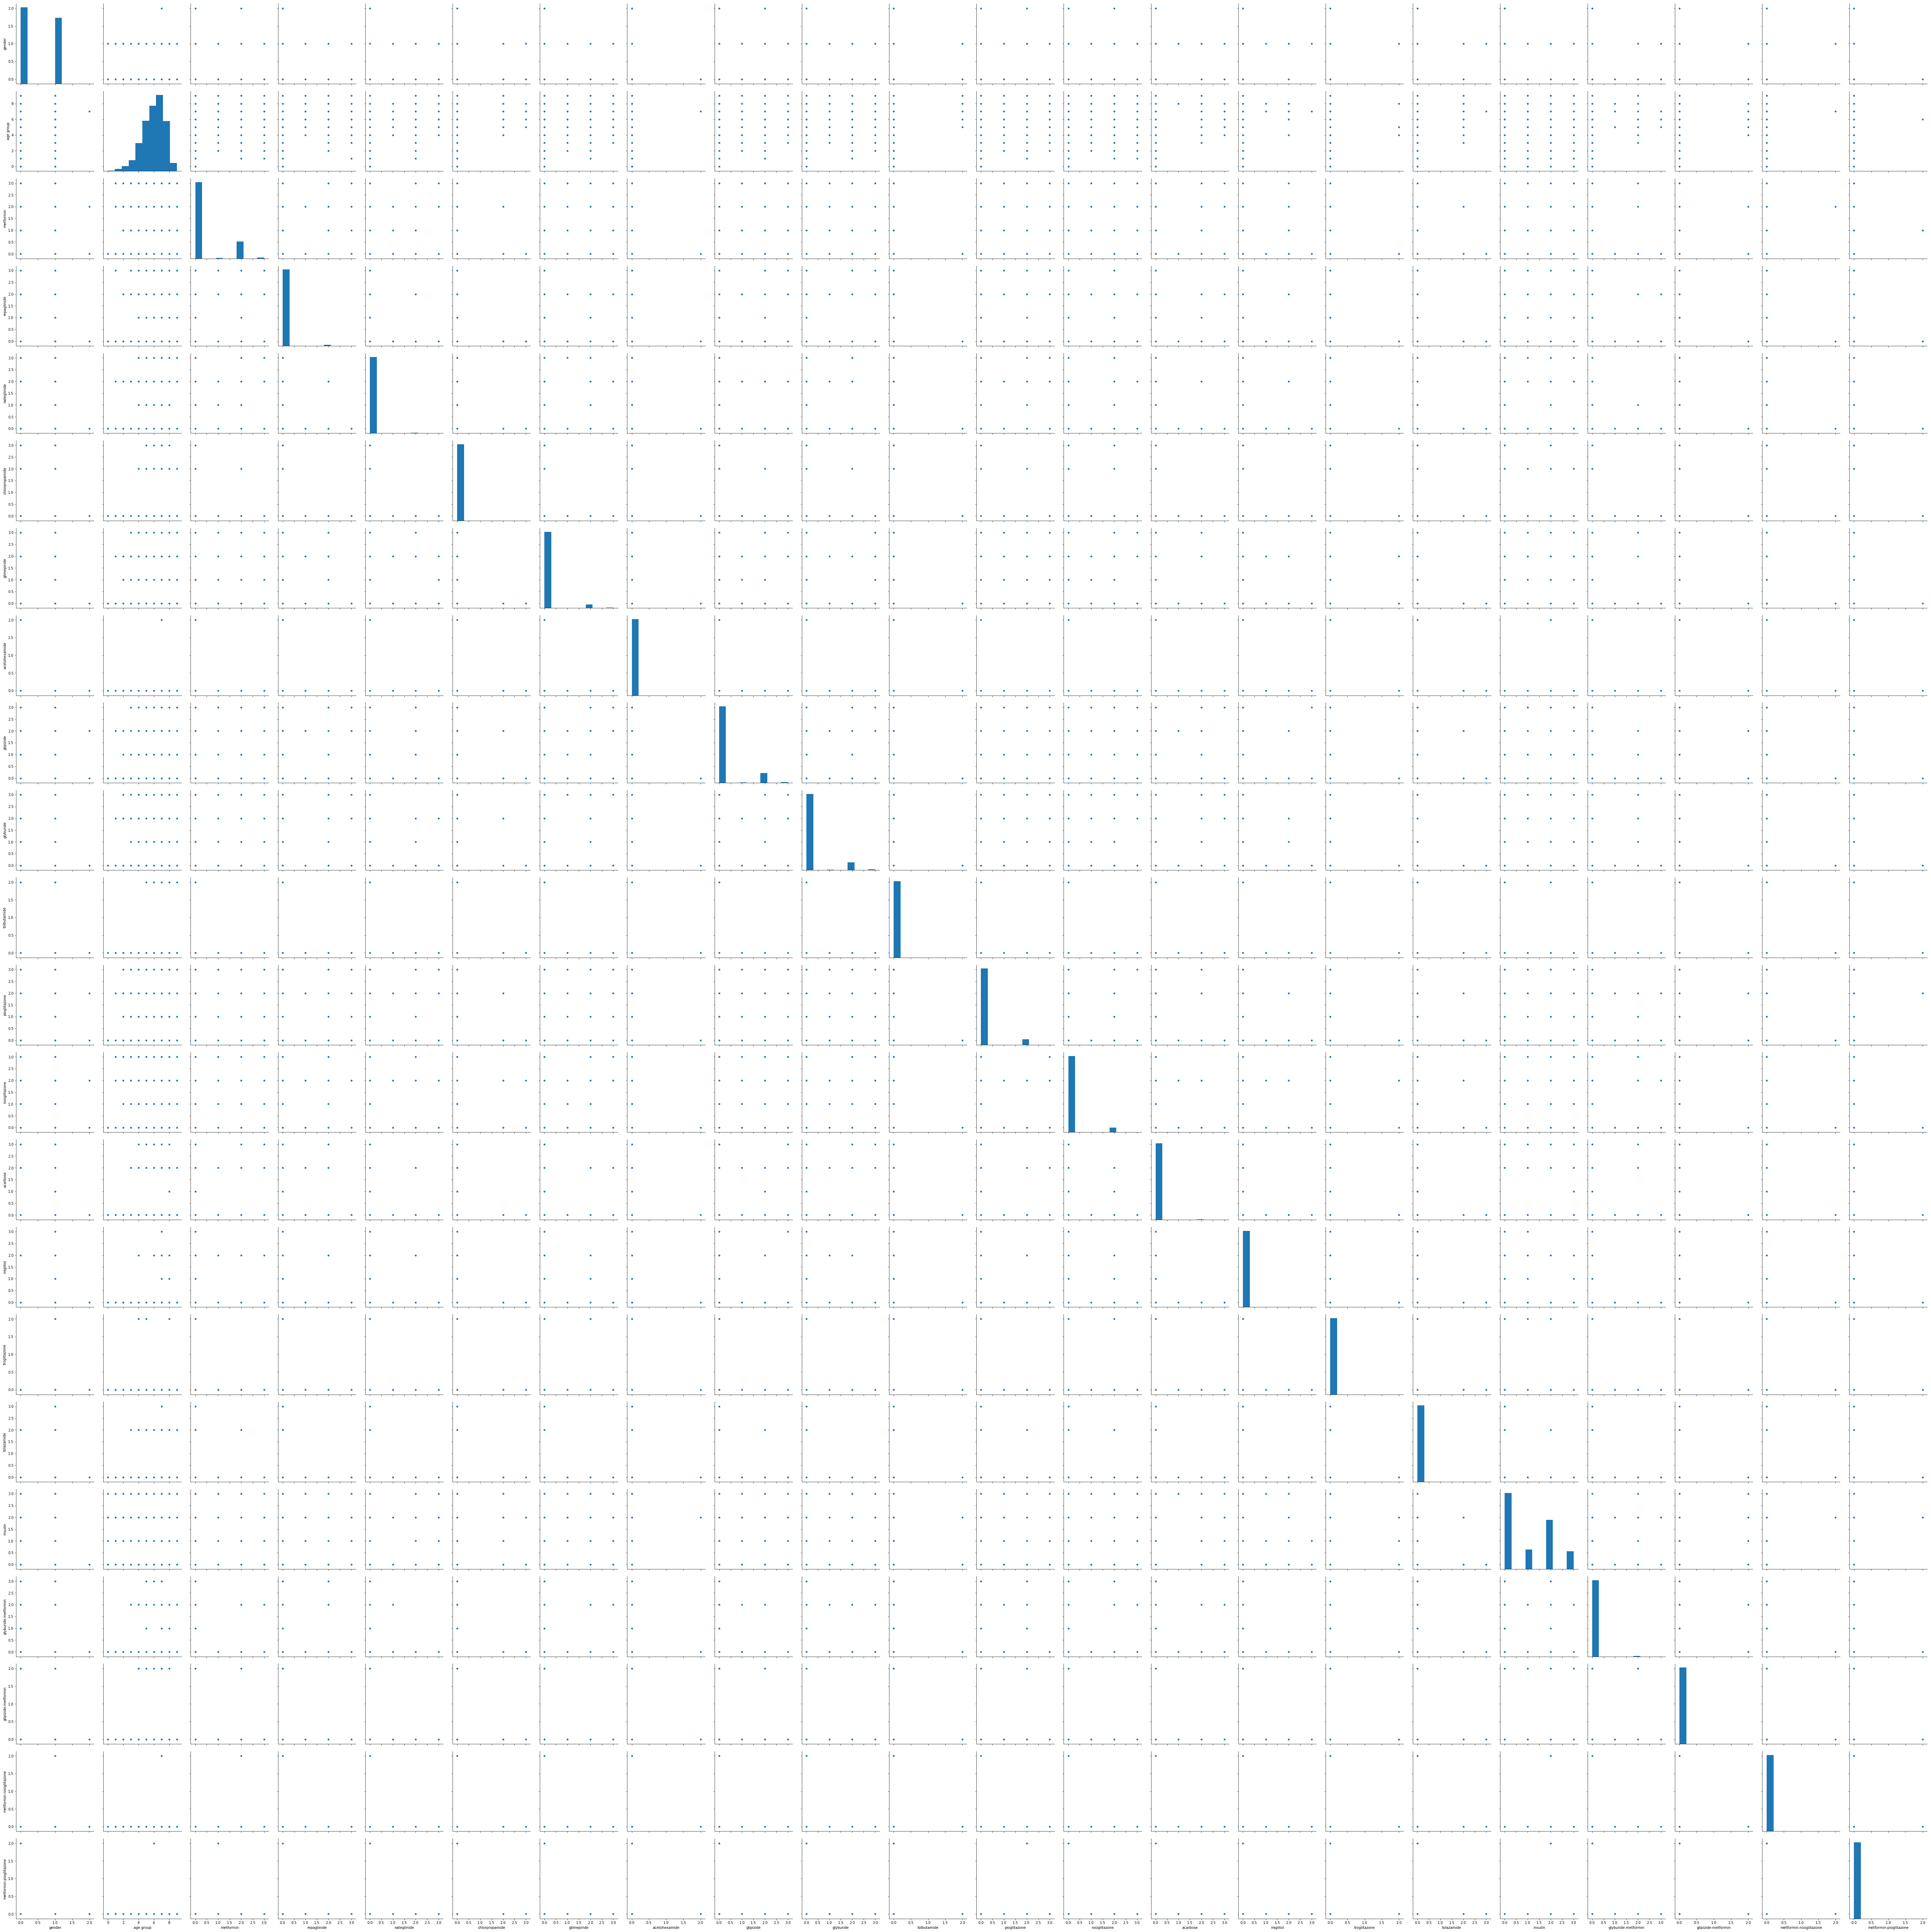

In [349]:
sns.pairplot(pts[cols], size = 3.5)
plt.show()

In [516]:
Y_train.shape

(71236, 1)

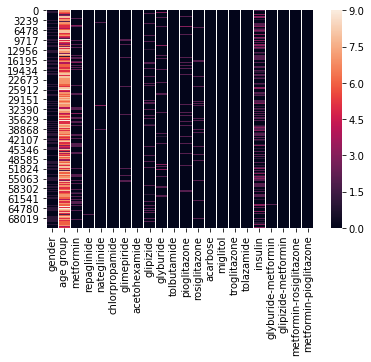

In [546]:
sns.heatmap(X_train)

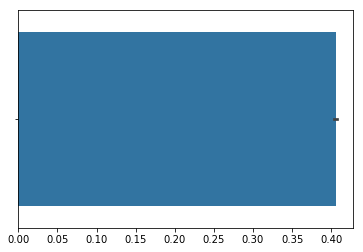

In [582]:
sns.barplot(X_train)

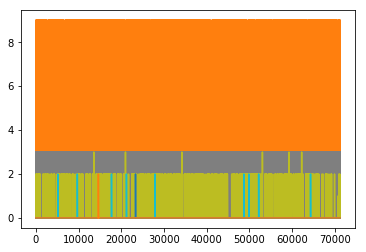

In [596]:
plt.plot(X_train)

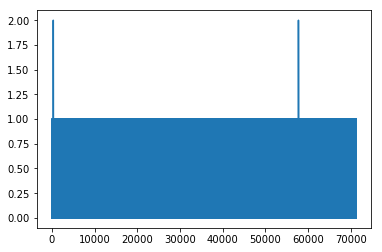

In [602]:
plt.plot(X_train['gender'])

# KNN Classifier

In [536]:
#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)

#Train the model using the training sets
knn.fit(X_train, Y_train)

y_pred = knn.predict(X_test)

C:\Users\Abubakar\Anaconda3\envs\tfdeeplearning\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


In [537]:
y_pred

array(['<30', 'NO', '>5', ..., '>5', 'NO', 'NO'], dtype=object)

In [581]:
knn=pd.DataFrame(y_pred,columns=['label'])
knn.index = np.arange(1,len(svm)+1)
knn.to_csv("C:/Users/Abubakar/Desktop/knn.csv")

# Random Forest Classifier 

In [538]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(n_estimators=100)

clf.fit(X_train,Y_train)

RFC=clf.predict(X_test.values)

C:\Users\Abubakar\Anaconda3\envs\tfdeeplearning\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [539]:
RFC

array(['NO', 'NO', '>5', ..., '>5', 'NO', 'NO'], dtype=object)

In [580]:
rfc=pd.DataFrame(RFC,columns=['label'])
rfc.index = np.arange(1,len(svm)+1)
rfc.to_csv("C:/Users/Abubakar/Desktop/rfc.csv")

# Support Vector Machine Classifier

In [540]:
from sklearn import svm# 2nd Classifier is Support Vector Machine

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, Y_train)

#Predict the response for test dataset
SVM = clf.predict(X_test.values)

C:\Users\Abubakar\Anaconda3\envs\tfdeeplearning\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [541]:
SVM

array(['NO', 'NO', 'NO', ..., 'NO', 'NO', 'NO'], dtype=object)

In [579]:
svm=pd.DataFrame(SVM,columns=['label'])
svm.index = np.arange(1,len(svm)+1)
svm.to_csv("C:/Users/Abubakar/Desktop/ssvm.csv")

# Naive Bayes Classifier

In [542]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, Y_train)

NBC=clf.predict(X_test.values)


C:\Users\Abubakar\Anaconda3\envs\tfdeeplearning\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [543]:
NBC

array(['<30', '<30', '<30', ..., '<30', '<30', '<30'], dtype='<U3')

In [578]:
NBc=pd.DataFrame(NBC,columns=['label'])
NBc.index = np.arange(1,len(NBc)+1)
NBc.to_csv("C:/Users/Abubakar/Desktop/NBC.csv")

# Decsion Tree Classifier

In [544]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

clf = clf.fit(X_train,Y_train)

DTC = clf.predict(X_test)

In [545]:
DTC

array(['>5', 'NO', '>5', ..., '>5', 'NO', 'NO'], dtype=object)

In [577]:
Dtc=pd.DataFrame(DTC,columns=['label'])
Dtc.index = np.arange(1,len(Dtc)+1)
Dtc.to_csv("C:/Users/Abubakar/Desktop/Dtc.csv")